In [4]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
def load_dataset():
    mndata = MNIST("../python-mnist/data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [5]:
X_train, labels_train, X_test, labels_test = load_dataset()


In [ ]:
# we create tensors in a similar way to numpy nd arrays
x_numpy = np.array([0.1, 0.2, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy, x_torch')
print(x_numpy, x_torch)
print()

# to and from numpy, pytorch
print('to and from numpy and pytorch')
print(torch.from_numpy(x_numpy), x_torch.numpy())
print()

# we can do basic operations like +-*/
y_numpy = np.array([3,4,5.])
y_torch = torch.tensor([3,4,5.])
print("x+y")
print(x_numpy + y_numpy, x_torch + y_torch)
print()

# many functions that are in numpy are also in pytorch
print("norm")
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print()

# to apply an operation along a dimension,
# we use the dim keyword argument instead of axis
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_torch = torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0))

In [7]:

print(d)

784


In [31]:
distr = torch.distributions.uniform.Uniform(0, 1)
distr.sample()

tensor(0.9487)

In [34]:
w = torch.empty(3, 5)
print(nn.init.uniform_(w))
print(w)

tensor([[0.3610, 0.5451, 0.1423, 0.7217, 0.8613],
        [0.9846, 0.9773, 0.5046, 0.0749, 0.9598],
        [0.0325, 0.5647, 0.2958, 0.8521, 0.7826]])
tensor([[0.3610, 0.5451, 0.1423, 0.7217, 0.8613],
        [0.9846, 0.9773, 0.5046, 0.0749, 0.9598],
        [0.0325, 0.5647, 0.2958, 0.8521, 0.7826]])


In [47]:
torch.mm(w.T,w)

tensor([[1.1008, 1.1773, 0.5578, 0.3620, 1.2814],
        [1.1773, 1.5711, 0.7378, 0.9478, 1.8494],
        [0.5578, 0.7378, 0.3624, 0.3926, 0.8384],
        [0.3620, 0.9478, 0.3926, 1.2525, 1.3603],
        [1.2814, 1.8494, 0.8384, 1.3603, 2.2755]])

In [105]:
W0 = nn.Linear(28 * 28, 2)

print(type(W0.parameters()))
list(W0.parameters())


<class 'generator'>


[Parameter containing:
 tensor([[ 0.0111,  0.0304,  0.0304,  ..., -0.0047, -0.0325,  0.0199],
         [ 0.0357,  0.0127, -0.0140,  ...,  0.0108, -0.0086, -0.0116]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0334, -0.0058], requires_grad=True)]

In [145]:
%%time
print("aa")

aa
CPU times: user 76 µs, sys: 16 µs, total: 92 µs
Wall time: 77.2 µs


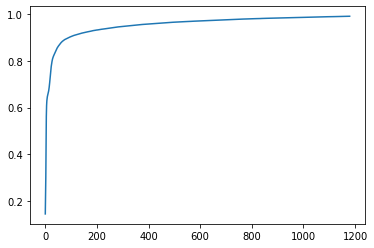

Total number of parameters in wide, shallow net:  50890
Test accuracy:  0.9682
Time takes:  3.9502110260000336


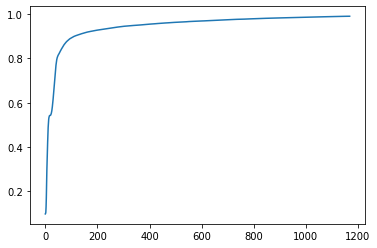

Total number of parameters in narrow, deep net:  26506
Test accuracy:  0.9633
Time takes:  3.408320251999612


In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
from matplotlib import pyplot as plt
import timeit

class shallow_n_wide(nn.Module):
    
    def __init__(self):
        super(shallow_n_wide, self).__init__()
        h = 64
        d = 28 * 28
        
        alpha_fn = lambda m:1/math.sqrt(m) # weight dimension n x m
        alpha1 = alpha_fn(d)
        alpha2 = alpha_fn(h)
        self.W0 = Variable(torch.FloatTensor(h, d).uniform_(-alpha1, alpha1).cuda(), requires_grad = True)
        self.bias0 = Variable(torch.FloatTensor(h).uniform_(-alpha1, alpha1).cuda(),requires_grad = True)        
        self.W1 = Variable(torch.FloatTensor(10, h).uniform_(-alpha2, alpha2).cuda(), requires_grad = True)
        self.bias1 = Variable(torch.FloatTensor(10).uniform_(-alpha2, alpha2).cuda(), requires_grad = True)

    def forward(self, x):
        x_pass1 = F.relu(torch.mm(x, self.W0.T) + self.bias0 )
        x_pass2 = torch.mm(x_pass1, self.W1.T) + self.bias1
        return x_pass2
    
    def get_parameters(self):
        return [self.W0, self.bias0, self.W1, self.bias1]
class narrow_n_deep(nn.Module):
    
    def __init__(self):
        
        super(narrow_n_deep, self).__init__()
        h0 = 32
        h1 = 32
        
        d = 28*28
        alpha_fn = lambda m:1/math.sqrt(m) # weight dimension n x m
        alpha1 = alpha_fn(d)
        alpha2 = alpha_fn(h0)
        alpha3 = alpha_fn(h1)
        self.W0 = Variable(torch.FloatTensor(h0, d).uniform_(-alpha1, alpha1).cuda(), requires_grad = True)
        self.bias0 = Variable(torch.FloatTensor(h0).uniform_(-alpha1, alpha1).cuda(),requires_grad = True)        
        self.W1 = Variable(torch.FloatTensor(h1, h0).uniform_(-alpha2, alpha2).cuda(), requires_grad = True)
        self.bias1 = Variable(torch.FloatTensor(h1).uniform_(-alpha2, alpha2).cuda(), requires_grad = True)
        self.W2 = Variable(torch.FloatTensor(10, h1).uniform_(-alpha3, alpha3).cuda(), requires_grad = True)
        self.bias2 = Variable(torch.FloatTensor(10).uniform_(-alpha3, alpha3).cuda(), requires_grad = True)
        
        
    def forward(self, x):
        x_pass1 = F.relu(torch.mm(x, self.W0.T)  +self.bias0 )
        x_pass2 = F.relu(torch.mm(x_pass1, self.W1.T) + self.bias1)
        x_pass3 = torch.mm(x_pass2, self.W2.T) + self.bias2
        return x_pass3
    
    
    def get_parameters(self):
        return [self.W0, self.bias0, self.W1, self.bias1, self.W2, self.bias2]
        

def get_num_parameters(ps):
    count = 0
    for p in ps:
        t = p.size()
        count_in_p = 1
        for i in t:
            count_in_p *= i
        count+= count_in_p
    return count
        
# data preparation 
X_train_t = torch.from_numpy(X_train).float().cuda()
labels_train_t = torch.from_numpy(labels_train).long().cuda()
X_test_t = torch.from_numpy(X_test).float().cuda()
labels_test_t = torch.from_numpy(labels_test).float().cuda()



n, d = X_train.shape
m, _ = X_test_t.shape







# gradient descent
accuracy = 0
acc_l = []

count = 0


# first net
start = timeit.default_timer()
with torch.cuda.device(0):
    net1 = shallow_n_wide()
    net1.zero_grad()
    optim = torch.optim.Adam(net1.get_parameters()) # optimizer hold the current state and upate the parameters based on compted graidents

    while accuracy < 0.99:
        out = net1(X_train_t)
        predictions = torch.argmax(out, axis = 1)

        accuracy = torch.sum(predictions == labels_train_t).item()/n
        loss = F.cross_entropy(out, labels_train_t)
        optim.zero_grad() # init gradients each loop
        loss.backward()
        optim.step() # update parameters w, b
        acc_l.append(accuracy)
time = timeit.default_timer() - start
plt.plot(range(len(acc_l)), acc_l   )
plt.savefig("A5a")
plt.show()

test_accuracy1 = torch.sum(torch.argmax(net1(X_test_t), axis = 1) == labels_test_t).item()/m

print("Total number of parameters in wide, shallow net: ", get_num_parameters(net1.get_parameters()))
print("Test accuracy: ", test_accuracy1)
print("Time takes: " , time)

# gradient descent
accuracy = 0
acc_l = []

count = 0

# second net
start = timeit.default_timer()
with torch.cuda.device(0):
    net2 = narrow_n_deep()
    net2.zero_grad()
    optim = torch.optim.Adam(net2.get_parameters()) # optimizer hold the current state and upate the parameters based on compted graidents

    while accuracy < 0.99:
        out = net2(X_train_t)
        predictions = torch.argmax(out, axis = 1)

        accuracy = torch.sum(predictions == labels_train_t).item()/n
        loss = F.cross_entropy(out, labels_train_t)
        optim.zero_grad() # init gradients each loop
        loss.backward()
        optim.step() # update parameters w, b
        acc_l.append(accuracy)
time = timeit.default_timer() - start
test_accuracy2 = torch.sum(torch.argmax(net2(X_test_t), axis = 1) == labels_test_t).item()/m

plt.plot(range(len(acc_l)), acc_l   )
plt.savefig("A5b")
plt.show()
print("Total number of parameters in narrow, deep net: ", get_num_parameters(net2.get_parameters()))
print("Test accuracy: ", test_accuracy2)
print("Time takes: " , time)